In [ ]:
# #run locally
# import pandas as pd
# import numpy as np
# import os
# pd.set_option("max_colwidth", None)
# # pd.set_option("display.max_columns",None)

# anime = pd.read_csv("anime.csv")
# users = pd.read_csv("rating.csv")
# path="./"

<h2>Data Loading</h2>

In [ ]:
#run on kaggle or collab environment
import kagglehub, os
import pandas as pd
import numpy as np
pd.set_option("max_colwidth", None)
# pd.set_option("display.max_columns",None)

# Download latest version
path = kagglehub.dataset_download("CooperUnion/anime-recommendations-database")

print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/CooperUnion/anime-recommendations-database/versions/1


['anime.csv', 'rating.csv']

In [2]:
anime = pd.read_csv(os.path.join(path,"anime.csv"))
users = pd.read_csv(os.path.join(path,"rating.csv"))

<h2>Data Understanding</h2>

In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Dataset anime terdiri atas 7 variabel. 3 variabel merupakan variabel numerik (anime_id dan member memiliki tipe data int64 sedangkan rating memiliki tipedata float), sedangkan sisanya merupakan variabel kategorikal.

Menghitung jumlah data unik dalam dataset anime

In [4]:
anime.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [5]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.16,151266


Data dalam variabel genre, nilai data merupakan sebuah list. Hal ini akan membuat ambiguitas dalam pemodelan nantinya. Data-data ini perlu di-encode agar proses cosine similarity dapat berjalan dengan baik. Namun, sebelum hal itu dilakukan, dataset perlu dicek terlebih dahulu apakah terdapat data yang tidak memiliki nilai.

## Data Preparation

terdapat data kosong dalam variable fitur type

In [6]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

terdapat 62 data kosong dalam variabel genre, 25 dalam variabel type dan 230  di rating.

<h3>Membersihkan data yang tidak memiliki nilai</h3>

In [9]:
anime=anime.dropna()
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Setelah data-data yang tidak memiliki nilai dihapus, dataset sekarang tidak memiliki nilai yang kosong. Dataset diurutkan berdasarkan anime_id.

In [10]:
anime=anime.sort_values("anime_id")
anime

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2095,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848
...,...,...,...,...,...,...,...
9991,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51
10444,34490,Sushi Azarashi,Comedy,TV,30,3.00,12
9266,34503,Kochinpa! Dainiki,Comedy,TV,24,3.40,75
2726,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295


In [ ]:
anime.shape

(12017, 7)

Data yang telah dibersihkan sekarang memiliki 12017 baris data.

Memeriksa apakah data memiliki data duplikat

In [11]:
anime=anime.drop_duplicates()
anime

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2095,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848
...,...,...,...,...,...,...,...
9991,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51
10444,34490,Sushi Azarashi,Comedy,TV,30,3.00,12
9266,34503,Kochinpa! Dainiki,Comedy,TV,24,3.40,75
2726,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295


Dataset tetap memiliki 12017 baris data. Data tidak memiliki nilai-nilai duplikat.

<h3>Vektorisasi Genre</h3>
<p>Agar data dapat dilihat kemiripannya, perlu dilakukan cosine similarity yang berupa vektor. Namun karena data pada genre masih dalam bentuk list pada nilai datanya, hal ini akan menimbulkan ambiguitas dan model akan kesulitan untuk mengidentifikasi kemiripannya. Oleh karena itu nilai-nilai pada list perlu dipecah terlebih dahulu ke satu array/list yang terdiri atas data genre satuan. Setelah itu, dicocokan dengan genre apa saja yang ada dalam suatu data. Secara singkat, data-data genre yang unik dikumpulkan, dilakukan one-hot encoding dan memberikan nilai 1 kepada data yang terdapat dalam list genre.</p>

Mengumpulkan data-data genre yang unik ke dalam satu list

In [12]:
genres=[]
for genre_list in anime.genre:
    genre_list=genre_list.split(", ")
    for genre in genre_list:
        if genre not in genres:
            genres.append(genre)

Melakukan one-hot encoding berdasarkan list data-data unik genre yang sebelumnya dikumpulkan. Dataframe dibuat dan diberikan nilai 0 pada setiap data agar jika data terdapat di list genre, kolum genre tersebut akan bernilai 1.

In [13]:
genre_dict={}
for i in genres:
    genre_dict[i]=[0]
genres=pd.DataFrame(genre_dict,dtype=int)
del(genre_dict)
genres

,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,Magic,Police,Supernatural,...,Shoujo,Harem,Music,Shoujo Ai,Shounen Ai,Kids,Hentai,Parody,Yuri,Yaoi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>Terdapat 43 variabel genre hasil one-hot encoding</p>
<p>Sekarang, menggabungkan dataframe genre yang telah dilakukan one-hot encoding dengan dataframe anime</p>

In [14]:
anime_joined=pd.concat([anime.anime_id,genres],axis=1)
anime_joined

,anime_id,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,Magic,Police,...,Shoujo,Harem,Music,Shoujo Ai,Shounen Ai,Kids,Hentai,Parody,Yuri,Yaoi
22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3159,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,34476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10444,34490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9266,34503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2726,34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Karena penggabungan,

In [15]:
anime_joined=anime_joined.fillna(int(0))
anime_joined=anime_joined.astype('int')
anime_joined

,anime_id,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,Magic,Police,...,Shoujo,Harem,Music,Shoujo Ai,Shounen Ai,Kids,Hentai,Parody,Yuri,Yaoi
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2095,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,34476,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10444,34490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9266,34503,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2726,34514,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
anime_joined.isnull().sum()

anime_id         0
Action           0
Adventure        0
Comedy           0
Drama            0
Sci-Fi           0
Space            0
Mystery          0
Magic            0
Police           0
Supernatural     0
Fantasy          0
Shounen          0
Sports           0
Josei            0
Romance          0
Slice of Life    0
Cars             0
Seinen           0
Horror           0
Psychological    0
Thriller         0
Martial Arts     0
Super Power      0
School           0
Ecchi            0
Vampire          0
Historical       0
Military         0
Dementia         0
Mecha            0
Demons           0
Samurai          0
Game             0
Shoujo           0
Harem            0
Music            0
Shoujo Ai        0
Shounen Ai       0
Kids             0
Hentai           0
Parody           0
Yuri             0
Yaoi             0
dtype: int64

In [17]:
anime_joined=pd.merge(anime,anime_joined,on="anime_id")
anime_joined

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Comedy,...,Shoujo,Harem,Music,Shoujo Ai,Shounen Ai,Kids,Hentai,Parody,Yuri,Yaoi
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12013,34490,Sushi Azarashi,Comedy,TV,30,3.00,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12014,34503,Kochinpa! Dainiki,Comedy,TV,24,3.40,75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12015,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
for i,genres in enumerate(anime_joined.genre):
    for genre in genres.split(", "):
        label=genre
        anime_joined.loc[i,label]=1

In [19]:
anime_joined

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Comedy,...,Shoujo,Harem,Music,Shoujo Ai,Shounen Ai,Kids,Hentai,Parody,Yuri,Yaoi
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12013,34490,Sushi Azarashi,Comedy,TV,30,3.00,12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12014,34503,Kochinpa! Dainiki,Comedy,TV,24,3.40,75,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12015,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
anime_joined=pd.concat([anime_joined,pd.get_dummies(anime_joined["type"],prefix="type",dtype=int)],axis=1)
anime_joined

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Comedy,...,Hentai,Parody,Yuri,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12013,34490,Sushi Azarashi,Comedy,TV,30,3.00,12,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12014,34503,Kochinpa! Dainiki,Comedy,TV,24,3.40,75,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12015,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
genres_features=anime_joined.columns.to_list()[7:]
genres_features

['Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Sci-Fi',
 'Space',
 'Mystery',
 'Magic',
 'Police',
 'Supernatural',
 'Fantasy',
 'Shounen',
 'Sports',
 'Josei',
 'Romance',
 'Slice of Life',
 'Cars',
 'Seinen',
 'Horror',
 'Psychological',
 'Thriller',
 'Martial Arts',
 'Super Power',
 'School',
 'Ecchi',
 'Vampire',
 'Historical',
 'Military',
 'Dementia',
 'Mecha',
 'Demons',
 'Samurai',
 'Game',
 'Shoujo',
 'Harem',
 'Music',
 'Shoujo Ai',
 'Shounen Ai',
 'Kids',
 'Hentai',
 'Parody',
 'Yuri',
 'Yaoi',
 'type_Movie',
 'type_Music',
 'type_ONA',
 'type_OVA',
 'type_Special',
 'type_TV']

In [22]:
anime_joined

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Comedy,...,Hentai,Parody,Yuri,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12013,34490,Sushi Azarashi,Comedy,TV,30,3.00,12,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12014,34503,Kochinpa! Dainiki,Comedy,TV,24,3.40,75,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12015,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
try:
    anime_joined=anime_joined.drop(["type","rating","members"],axis=1)
except:
    pass
anime_joined

,anime_id,name,genre,episodes,Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,Hentai,Parody,Yuri,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",1,1,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,6,Trigun,"Action, Comedy, Sci-Fi",26,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",26,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",52,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12013,34490,Sushi Azarashi,Comedy,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12014,34503,Kochinpa! Dainiki,Comedy,24,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12015,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",18,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
pd.DataFrame(anime_joined[genres_features].to_numpy(),index=anime_joined.name,columns=genres_features)

,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,Magic,Police,Supernatural,...,Hentai,Parody,Yuri,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Cowboy Bebop: Tengoku no Tobira,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Trigun,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Witch Hunter Robin,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
Beet the Vandel Buster,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Platonic Chain: Ansatsu Jikkouchuu,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Sushi Azarashi,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Kochinpa! Dainiki,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(anime_joined[genres_features].to_numpy())

In [ ]:
cosine_sim

array([[1.        , 0.6172134 , 0.75592895, ..., 0.53452248, 0.3086067 ,
        0.26726124],
       [0.6172134 , 1.        , 0.40824829, ..., 0.        , 0.16666667,
        0.        ],
       [0.75592895, 0.40824829, 1.        , ..., 0.70710678, 0.20412415,
        0.35355339],
       ...,
       [0.53452248, 0.        , 0.70710678, ..., 1.        , 0.        ,
        0.5       ],
       [0.3086067 , 0.16666667, 0.20412415, ..., 0.        , 1.        ,
        0.        ],
       [0.26726124, 0.        , 0.35355339, ..., 0.5       , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_joined.name, columns=anime_joined.name)
print('Shape:', cosine_sim_df.shape)

Shape: (12017, 12017)


In [ ]:
cosine_sim_df

name,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Beet the Vandel Buster,Eyeshield 21,Hachimitsu to Clover,Hungry Heart: Wild Striker,Initial D Fourth Stage,Monster,...,Hashiri Hajimeta bakari no Kimi ni,Masou Gakuen HxH Specials,Uma Musume: Pretty Derby,Gijinka de Manabo!,Monster Strike: Rain of Memories,Platonic Chain: Ansatsu Jikkouchuu,Sushi Azarashi,Kochinpa! Dainiki,Pokemon Generations,Mobile Suit Gakuen: G-Reco Koushien
name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,1.000000,0.617213,0.755929,0.428571,0.338062,0.507093,0.507093,0.338062,0.462910,0.267261,...,0.0,0.000000,0.267261,0.436436,0.188982,0.218218,0.534522,0.534522,0.308607,0.267261
Cowboy Bebop: Tengoku no Tobira,0.617213,1.000000,0.408248,0.462910,0.000000,0.182574,0.182574,0.000000,0.333333,0.288675,...,0.0,0.000000,0.288675,0.235702,0.204124,0.235702,0.000000,0.000000,0.166667,0.000000
Trigun,0.755929,0.408248,1.000000,0.377964,0.223607,0.670820,0.447214,0.447214,0.408248,0.176777,...,0.0,0.000000,0.353553,0.577350,0.250000,0.288675,0.707107,0.707107,0.204124,0.353553
Witch Hunter Robin,0.428571,0.462910,0.377964,1.000000,0.338062,0.338062,0.338062,0.169031,0.462910,0.534522,...,0.0,0.000000,0.267261,0.000000,0.188982,0.000000,0.267261,0.267261,0.154303,0.000000
Beet the Vandel Buster,0.338062,0.000000,0.223607,0.338062,1.000000,0.400000,0.200000,0.400000,0.182574,0.158114,...,0.0,0.000000,0.000000,0.000000,0.223607,0.000000,0.316228,0.316228,0.365148,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Platonic Chain: Ansatsu Jikkouchuu,0.218218,0.235702,0.288675,0.000000,0.000000,0.000000,0.000000,0.258199,0.000000,0.000000,...,0.0,0.333333,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.408248
Sushi Azarashi,0.534522,0.000000,0.707107,0.267261,0.316228,0.632456,0.632456,0.632456,0.288675,0.250000,...,0.0,0.000000,0.000000,0.408248,0.000000,0.000000,1.000000,1.000000,0.000000,0.500000
Kochinpa! Dainiki,0.534522,0.000000,0.707107,0.267261,0.316228,0.632456,0.632456,0.632456,0.288675,0.250000,...,0.0,0.000000,0.000000,0.408248,0.000000,0.000000,1.000000,1.000000,0.000000,0.500000


In [ ]:
def anime_recommendations(anime_title, similarity_data=cosine_sim_df, items=anime_joined[anime_joined.columns.to_list()[1:]], k=5):
    """
    Rekomendasi anime berdasarkan kemiripan dataframe

    Parameter:
    ---
    anime_title : tipe data string (str)
                judul anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,anime_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop anime_title agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
anime_joined.loc[anime_joined.name=="Toaru Majutsu no Index"]

,anime_id,name,genre,episodes,Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,Hentai,Parody,Yuri,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
3760,4654,Toaru Majutsu no Index,"Action, Magic, Sci-Fi, Super Power",24,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
anime_recommendations("Toaru Majutsu no Index")

,name,genre,episodes,Action,Adventure,Comedy,Drama,Sci-Fi,Space,Mystery,...,Hentai,Parody,Yuri,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,Toaru Majutsu no Index II,"Action, Magic, Sci-Fi, Super Power",24,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Persona: Trinity Soul,"Action, Sci-Fi, Super Power",26,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Toaru Kagaku no Railgun,"Action, Sci-Fi, Super Power",24,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Toaru Kagaku no Railgun S,"Action, Sci-Fi, Super Power",24,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ougon Bat,"Action, Sci-Fi, Super Power",52,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<h2>Collaborative Filtering</h2>

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

<h3>Data Understanding</h3>

In [28]:
df = users

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Terdapat 3 variabel: user_id, anime_id, dan rating. Ketiga data tersebut memiliki tipe data int64

In [30]:
df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


rating -1 berarti penonton hanya menonton dan tidak memberikan rating

In [31]:
df = df.loc[df["rating"]!=-1]
df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


<h3>Data Preparation</h3>
Mengecek apakah dataset memiliki nilai kosong

In [32]:
df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Dataset tidak memiliki nilai data kosong

Menghilankan data yang anime_id nya tidak ada di dataset anime yang telah diolah

In [33]:
df=df[df.anime_id.isin(anime_joined.anime_id.values)]
df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Memeriksa data duplikat

In [34]:
df = df.drop_duplicates()
df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


terdapat 1 data duplikat dalam dataset.

<h4>Encoding user data</h4>
UserId and animeId perlu disandikan (encode) agar mudah terbaca oleh model

In [ ]:
userId = df.user_id.unique().tolist()
animeId = anime_joined.anime_id.tolist()

#encoding userId
userIdEncoded = {x:i for i,x in enumerate(userId)}
# print("encoded userId: ",userIdEncoded)

#encoding angka ke userId
encodedToUserId = {i:x for i,x in enumerate(userId)}
# print("encoded angka ke userId: ",encodedToUserId)

#encoding animeId
animeIdEncoded = {x:i for i,x in enumerate(animeId)}
# print("encoded animeid: ",animeIdEncoded)

#encoding angka ke animeId
encodedToAnimeId = {i:x for i,x in enumerate(animeId)}
# print("encoded angka ke animeId: ",encodedToAnimeId)


In [ ]:
anime_df = anime[anime.anime_id.isin(df.anime_id.unique())]
anime_df

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2095,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848
...,...,...,...,...,...,...,...
7459,34324,Chiryokumaru,Action,ONA,1,5.40,817
3219,34325,Pokemon XY&amp;Z Specials,"Action, Adventure, Comedy, Fantasy, Kids",Special,2,7.05,1454
2394,34349,Diamond no Ace: Second Season OVA,"Comedy, School, Shounen, Sports",OVA,2,7.25,1885
6731,34367,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports",Special,1,5.97,582


Mapping user_id dan anime_id ke dataframe

In [ ]:
df.user_id = df.user_id.map(userIdEncoded)
df.anime_id = df.anime_id.map(animeIdEncoded)
df

<ipython-input-41-9e3bf9a297f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.user_id = df.user_id.map(userIdEncoded)
<ipython-input-41-9e3bf9a297f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.anime_id = df.anime_id.map(animeIdEncoded)


,user_id,anime_id,rating
47,0,5225,10
81,0,6585,10
83,0,6624,10
101,0,7280,10
153,1,6630,10
...,...,...,...
7813732,69598,7468,7
7813733,69598,7620,9
7813734,69598,8616,10
7813735,69599,718,9


In [ ]:
# Mendapatkan jumlah user
num_users = len(userIdEncoded)


# Mendapatkan jumlah judul anime
num_anime = len(animeIdEncoded)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

<ipython-input-42-e8f323db289b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].values.astype(np.float32)


Number of User: 69600, Number of anime: 12017, Min Rating: 1.0, Max Rating: 10.0


Mempersiapkan data training dan test

In [ ]:
from sklearn.model_selection import train_test_split

#mengacak data
df = df.sample(frac=1, random_state=42)

x = df[["user_id","anime_id"]].values
y = df["rating"].apply(lambda x: (x - min_rating)/(max_rating - min_rating)).values

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.2, random_state=42)
X_train

array([[45131,  5308],
       [48519,  4060],
       [43073,  4639],
       ...,
       [23131,  3578],
       [22850,  7249],
       [45530,    69]])

<h2>Training Model</h2>

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embeddings = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embeddings(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_resto + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("root_mean_squared_error")<=0.15):
      print("root_mean_squared_error telah mencapai <=0.15!")
      self.model.stop_training = True
callbacks = myCallback()

reduce_lr = ReduceLROnPlateau(monitor='root_mean_squared_error', factor=0.5, patience=5, min_lr=1e-4, verbose=1)
early_stopping = EarlyStopping(monitor="root_mean_squared_error", mode='min', min_delta=0.1, patience=10, restore_best_weights=True)

In [ ]:
# Memulai training

history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    epochs = 3,
    validation_data = (X_test, y_test))

Epoch 1/3
79215/79215 ━━━━━━━━━━━━━━━━━━━━ 572s 7ms/step - loss: 0.5693 - root_mean_squared_error: 0.1881 - val_loss: 0.5372 - val_root_mean_squared_error: 0.1478
Epoch 2/3
79215/79215 ━━━━━━━━━━━━━━━━━━━━ 567s 7ms/step - loss: 0.5338 - root_mean_squared_error: 0.1441 - val_loss: 0.5315 - val_root_mean_squared_error: 0.1420
Epoch 3/3
79215/79215 ━━━━━━━━━━━━━━━━━━━━ 574s 7ms/step - loss: 0.5282 - root_mean_squared_error: 0.1384 - val_loss: 0.5296 - val_root_mean_squared_error: 0.1401


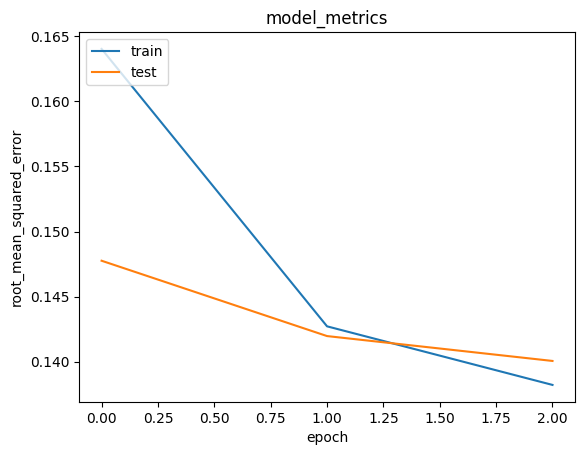

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h3>Menyimpan Model</h3>

In [ ]:
model.save('my_model.keras')


In [ ]:
user_id = df.user_id.sample(1).iloc[0]
anime_watched_by_user = df[df.user_id == user_id]
anime_not_watched = anime_df[~anime_df["anime_id"].isin(anime_watched_by_user.anime_id.values)]["anime_id"]
# anime_not_watched = [[animeIdEncoded.get(x)] for x in anime_not_watched]
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(animeIdEncoded.keys()))
)
anime_not_watched = [[animeIdEncoded.get(x)] for x in anime_not_watched]
user_encoder = userIdEncoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched),anime_not_watched)
)

In [ ]:
ratings = model.predict(user_anime_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    encodedToAnimeId.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

resto_df_rows = anime_joined[anime_joined['anime_id'].isin(top_anime_user)]
for row in resto_df_rows.itertuples():
    print(row.name, ':', row.genre)

print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)

recommended_anime = anime_joined[anime_joined['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name, ':', row.genre)

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 43878
anime with high ratings from user
--------------------------------
Ranma ½: Kessen Tougenkyou! Hanayome wo Torimodose! : Adventure, Comedy, Shounen
Future GPX Cyber Formula Zero : Drama, Sci-Fi, Shounen, Sports
Gregory Horror Show : Comedy, Demons, Horror, Mystery, Supernatural, Vampire
Houkago no Pleiades : Magic
--------------------------------
Top 10 anime recommendation
--------------------------------
Ginga Eiyuu Densetsu : Drama, Military, Sci-Fi, Space
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Fullmetal Alchemist: Brotherhood : Action, Adventure, Drama, Fantasy, Magic, Military, Shounen
Steins;Gate : Sci-Fi, Thriller
Gintama&#039; : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Hunter x Hunter (2011) : Action, Adventure, Shounen, Super Power
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
